In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Veri setinin yolunu belirtin
data_path ='/content/drive/MyDrive/finally/data.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-9')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.shape[0]

541909

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478



# **DATA ANALYST END**


# **DATA CLEANING START**

# 1) Eksik değerleri ele alma

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values_percent = (missing_values  / len(df)) * 100
print(missing_values_percent)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


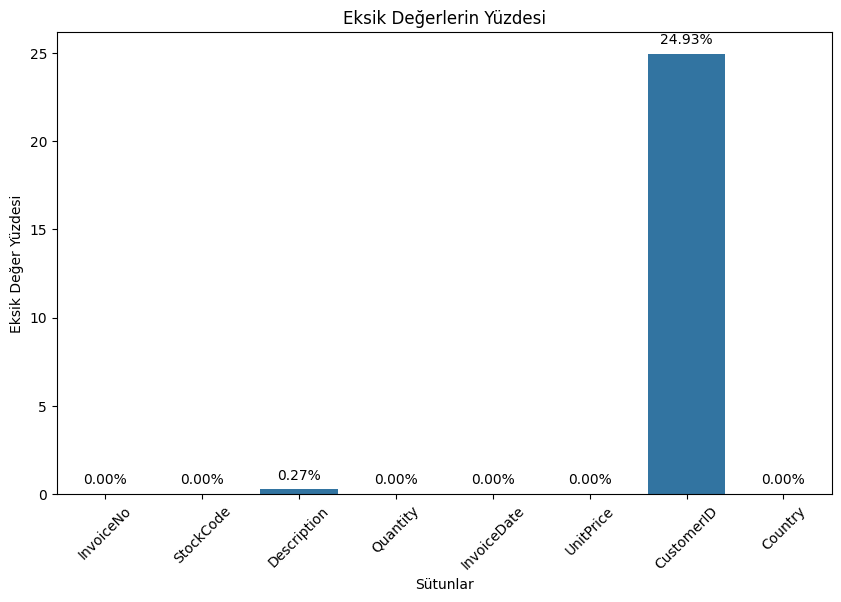

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values_percent.index, y=missing_values_percent)
plt.title('Eksik Değerlerin Yüzdesi')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Değer Yüzdesi')
plt.xticks(rotation=45)

# Eksik değer yüzdesini çubukların üstünde gösterme
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
df[df['CustomerID'].isnull() | df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
df['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)


In [ ]:
most_common_description = df['Description'].mode()[0]  # En yaygın değeri bul
df['Description'].fillna(most_common_description, inplace=True)


In [ ]:
nan_sayisi = df.isnull().sum().sum()

print("Temizlenmiş DataFrame'deki NaN Değer Sayısı:", nan_sayisi)

Temizlenmiş DataFrame'deki NaN Değer Sayısı: 0


In [ ]:
df.head(1410)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,12/1/2010 14:05,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,12/1/2010 14:05,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,12/1/2010 14:05,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,12/1/2010 14:05,2.25,14911.0,EIRE


In [ ]:
df.shape[0]

541909

# 2) Yinelenen değerleri Düzenleme

In [ ]:
# Yinelenen satırları bulma
duplicate_rows = df[df.duplicated(keep=False)]

# Sıralama kriterlerine göre veriyi sıralama
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


Tamamen aynı olan satırlar elde ettik. Bu da kayıt işleminden kaynaklı bir hata olabilir. Tamamen aynı bir verinin 2 kez tekrar etmesinin bize bir yararı olmayacağı gibi sıkıntı çıkarabilir. Bu nedenle tekrarlayan değerlerimizi kaldırıyorum.

In [ ]:
print(f"Veri kümesi, kaldırılması gereken {df.duplicated().sum()}  yinelenen satır içeriyor.")

df.drop_duplicates(inplace=True)

Veri kümesi, kaldırılması gereken 5268  yinelenen satır içeriyor.


In [ ]:
df.shape[0]

536641

# 3) İptal edilen İşlemleri Düzenleme

In [ ]:
# "InvoiceNo" sütununda "C" ile başlayan faturaları iptal edilen işlemler olarak kabul edelim
cancel_filter = df['InvoiceNo'].str.startswith('C')

# İptal edilen işlemleri filtreleme
transaction_cancelled = df[cancel_filter]

# İptal edilen işlemlere ait istatistiksel özetleri hesaplama (CustomerID sütununu hariç tutma)
summary_cancelled_transactions = transaction_cancelled.describe().drop('CustomerID', axis=1)

# İstatistiksel özetleri gösterme
print("İptal Edilen İşlemlere Ait İstatistiksel Özetler:")
print(summary_cancelled_transactions)

İptal Edilen İşlemlere Ait İstatistiksel Özetler:
           Quantity     UnitPrice
count   9251.000000   9251.000000
mean     -29.787050     48.570430
std     1147.997592    667.926393
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      5.950000
max       -1.000000  38970.000000


Çıktımızdan bir çıkarım yaparsak eğer; İptal edilen işlemlerdeki tüm miktarlar negatiftir, bu da bunların gerçekten iptal edilen siparişler olduğunu gösterir. Projenin müşterileri satın alma davranışlarına ve tercihlerine göre kümeleme ve nihayetinde bir öneri sistemi oluşturma hedefimiz var bu nedenle iptal modellerimizi anlamamız lazım ki stratejilerimizi buna uygun geliştirelim. Bu nedenle bu iptal edilen işlemleri işaretleyip veri kümesinde tutup daha fazla analiz yapmamız sağlanacak. Buna göre müşteri davranışlarına göre bir çıkarım yapıp iptal edilme olasılığı yüksek ürünlerin önerilmesi engellenecek.

In [ ]:
# "InvoiceNo" sütununda "C" ile başlayan faturaları iptal edilen işlemler olarak kabul edelim
df['Transaction_Status'] = np.where(df['InvoiceNo'].str.startswith('C'), 'Cancelled', 'Completed') #cancelled --> iptal edilen işlemi, completed tamamlanan işlemi gösteriyor.

# Veri setini güncelleme
print("İptal işlemler işaretlendi.")

# Veri setinin başını gösterme
df.head(240)


İptal işlemler işaretlendi.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled


# 4) StockCode anormalliklerini Düzenleme

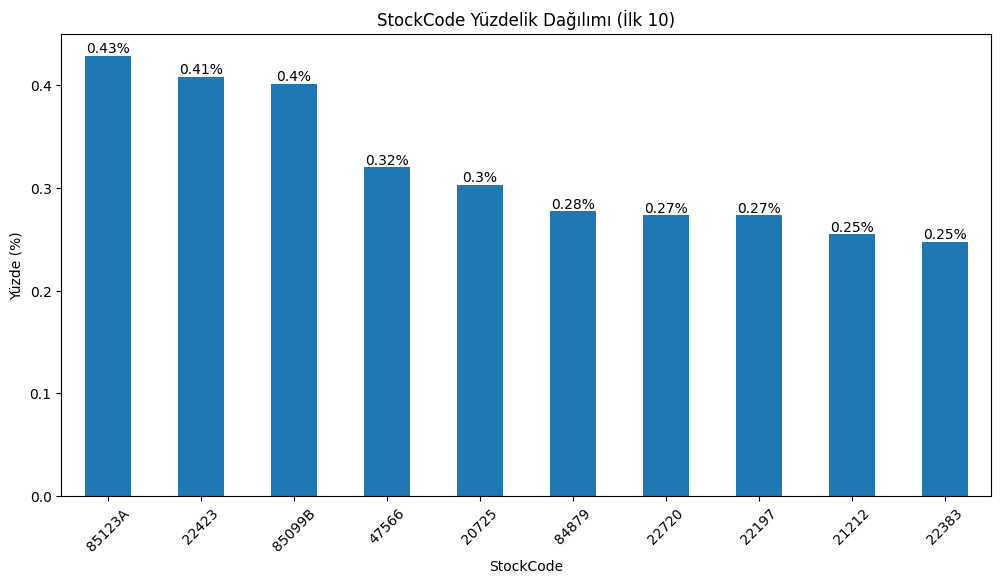

In [ ]:
import matplotlib.pyplot as plt

# Her bir StockCode'un veri setindeki yüzdelik dağılımını hesaplama
stockcode_distribution = df['StockCode'].value_counts(normalize=True) * 100

# Çubuk grafiği çizdirme
plt.figure(figsize=(12, 6))
bar_plot = stockcode_distribution.head(10).plot(kind='bar')
plt.title('StockCode Yüzdelik Dağılımı (İlk 10)')
plt.xlabel('StockCode')
plt.ylabel('Yüzde (%)')
plt.xticks(rotation=45)

# Çubukların üzerine yüzde değerlerini yazdırma
for index, value in enumerate(stockcode_distribution.head(10)):
    plt.text(index, value, f'{round(value, 2)}%', ha='center', va='bottom')

plt.show()

  Çıktımıza detaylı baktığımızda stok kodlarının çoğu 5 veya 6 karakterden oluşurken, 'POST' kodu gibi bazı anormallikler olduğunu gözlemliyoruz. Bu anormallikler gerçek ürünlerden ziyade hizmetleri veya ürün dışı işlemleri (belki de posta ücretlerini) temsil ediyor olabilir. Bu nedenle bunları ele almalıyız. Öncelikle stok kodumuzun normalini bularak başlayabiliriz. Bunun için az önce dediğimiz gibi stok kodlarımız 5 ve 6 değerden oluşuyor gibi duruyor ama daha da detaya inersek 'POST' dışında tüm stok kodlarımız 5 rakamdan oluşuyor, ekstra yanına harf alanlarda var ama bunu baa alarak sayısal değerler üzerinden normalimizi bulabiliriz. Bunun için bu mantıkla devam edelim..

In [ ]:
# Her bir StockCode'un içerdiği sayısal karakter sayısını hesaplayarak bir dictionary oluşturalım
stockcode_digit_lengths = {}
for stockcode in df['StockCode'].unique():
    digit_length = sum(c.isdigit() for c in stockcode)
    if digit_length in stockcode_digit_lengths:
        stockcode_digit_lengths[digit_length] += 1
    else:
        stockcode_digit_lengths[digit_length] = 1

# Oluşturduğumuz dictionary'i yazdıralım
for digit_length, count in sorted(stockcode_digit_lengths.items()):
    print(f"{digit_length} sayısal karakter içeren {count} adet StockCode bulunmaktadır.")

0 sayısal karakter içeren 13 adet StockCode bulunmaktadır.
1 sayısal karakter içeren 1 adet StockCode bulunmaktadır.
4 sayısal karakter içeren 14 adet StockCode bulunmaktadır.
5 sayısal karakter içeren 4037 adet StockCode bulunmaktadır.
6 sayısal karakter içeren 5 adet StockCode bulunmaktadır.


Buradan yola çıkarsak bizim stok kodumuzun normali tahmin ettiğimiz 5 sayısal değerden yani rakamdan oluşması. Çünkü sayısal orana baktığımızda 3676 tane 5 rakamdan oluşan değerimiz var diğerlerini de sayısından ötürü anormallerimiz kabul edersek anormallerimizi listeyelim.

In [ ]:
# Anormal uzunluklara sahip StockCode'ları bulma
abnormal_lengths = [length for length, count in stockcode_digit_lengths.items() if length != 5]

# Anormal uzunluklara sahip StockCode'ları listeleyip yazdırma
print("Anormal Uzunluklara Sahip StockCode'lar:")
for length in abnormal_lengths:
    abnormal_stockcodes = [stockcode for stockcode in df['StockCode'].unique() if sum(c.isdigit() for c in stockcode) == length]
    print(f"{length} sayısal karakter içeren StockCode'lar: {abnormal_stockcodes}")

Anormal Uzunluklara Sahip StockCode'lar:
0 sayısal karakter içeren StockCode'lar: ['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']
1 sayısal karakter içeren StockCode'lar: ['C2']
4 sayısal karakter içeren StockCode'lar: ['DCGS0076', 'DCGS0003', 'DCGS0070', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P']
6 sayısal karakter içeren StockCode'lar: ['gift_0001_40', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'gift_0001_10']


In [ ]:
# Bu stok kodlarına sahip kayıtların yüzdesinin hesaplanması
percentage_abnormals = (df['StockCode'].isin(abnormal_stockcodes).sum() / len(df)) * 100

# Yüzdeyi yazdırma
print(f"Veri kümesinde anormal stok kodlarına sahip kayıtların yüzdesi: {percentage_abnormals:.2f}%")

Veri kümesinde anormal stok kodlarına sahip kayıtların yüzdesi: 0.01%


Yüzdemize de bakarsak anormal stok kodlarımız verimizin çok az bir kısmını oluşturuyor. Bu bağlamda pazarlamayı optimize edeceğimiz bir öneri sistemi geliştireceğimiz göz önüne alındığında, anormal stok kodlarına sahip bu kayıtları veri setinden çıkarmak en mantıklısı olur. Bu şekilde, yalnızca gerçek ürün işlemlerine odaklanılarak daha doğru ve anlamlı bir analiz yapılabilecektir.

In [ ]:
# Anormal stok kodlarına sahip kayıtları filtreleme
df = df[~df['StockCode'].isin(abnormal_stockcodes)]

In [ ]:
# Anormal uzunluklara sahip StockCode'ları bulma
abnormal_lengths = [length for length, count in stockcode_digit_lengths.items() if length != 5]

# Anormal uzunluklara sahip StockCode'ları listeleyip yazdırma
print("Anormal Uzunluklara Sahip StockCode'lar:")
for length in abnormal_lengths:
    abnormal_stockcodes = [stockcode for stockcode in df['StockCode'].unique() if sum(c.isdigit() for c in stockcode) == length]
    print(f"{length} sayısal karakter içeren StockCode'lar: {abnormal_stockcodes}")

Anormal Uzunluklara Sahip StockCode'lar:
0 sayısal karakter içeren StockCode'lar: ['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK']
1 sayısal karakter içeren StockCode'lar: ['C2']
4 sayısal karakter içeren StockCode'lar: ['DCGS0076', 'DCGS0003', 'DCGS0070', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P']
6 sayısal karakter içeren StockCode'lar: []


In [ ]:
anomalous_stock_codes= ['POST', 'D', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK', 'DCGS0076', 'DCGS0003', 'DCGS0070', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'C2']

In [ ]:
# Anormal stok kodlarına sahip kayıtları filtreleme
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [ ]:
# Anormal uzunluklara sahip StockCode'ları bulma
abnormal_lengths = [length for length, count in stockcode_digit_lengths.items() if length != 5]

# Anormal uzunluklara sahip StockCode'ları listeleyip yazdırma
print("Anormal Uzunluklara Sahip StockCode'lar:")
for length in abnormal_lengths:
    anomalous_stock_codes = [stockcode for stockcode in df['StockCode'].unique() if sum(c.isdigit() for c in stockcode) == length]
    print(f"{length} sayısal karakter içeren StockCode'lar: {anomalous_stock_codes}")

Anormal Uzunluklara Sahip StockCode'lar:
0 sayısal karakter içeren StockCode'lar: []
1 sayısal karakter içeren StockCode'lar: []
4 sayısal karakter içeren StockCode'lar: []
6 sayısal karakter içeren StockCode'lar: []


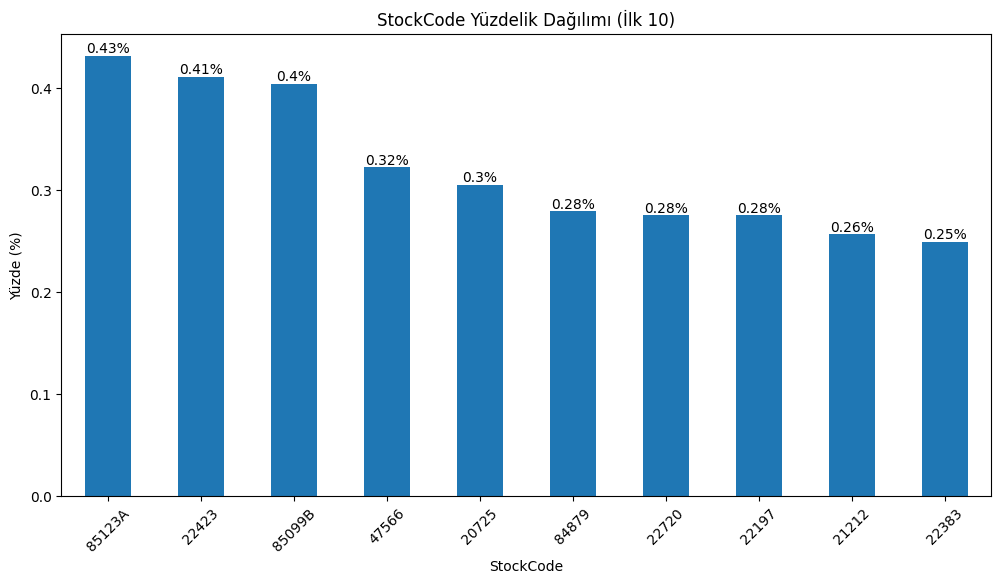

In [ ]:
import matplotlib.pyplot as plt

# Her bir StockCode'un veri setindeki yüzdelik dağılımını hesaplama
stockcode_distribution = df['StockCode'].value_counts(normalize=True) * 100

# Çubuk grafiği çizdirme
plt.figure(figsize=(12, 6))
bar_plot = stockcode_distribution.head(10).plot(kind='bar')
plt.title('StockCode Yüzdelik Dağılımı (İlk 10)')
plt.xlabel('StockCode')
plt.ylabel('Yüzde (%)')
plt.xticks(rotation=45)

# Çubukların üzerine yüzde değerlerini yazdırma
for index, value in enumerate(stockcode_distribution.head(10)):
    plt.text(index, value, f'{round(value, 2)}%', ha='center', va='bottom')

plt.show()

In [ ]:
df.shape[0]

533652

In [ ]:
# Bu stok kodlarına sahip kayıtların yüzdesinin hesaplanması
percentage_abnormals = (df['StockCode'].isin(abnormal_stockcodes).sum() / len(df)) * 100

# Yüzdeyi yazdırma
print(f"Veri kümesinde anormal stok kodlarına sahip kayıtların yüzdesi: {percentage_abnormals:.2f}%")

Veri kümesinde anormal stok kodlarına sahip kayıtların yüzdesi: 0.00%


# 5) Harf Anormalliklerini Düzenleme

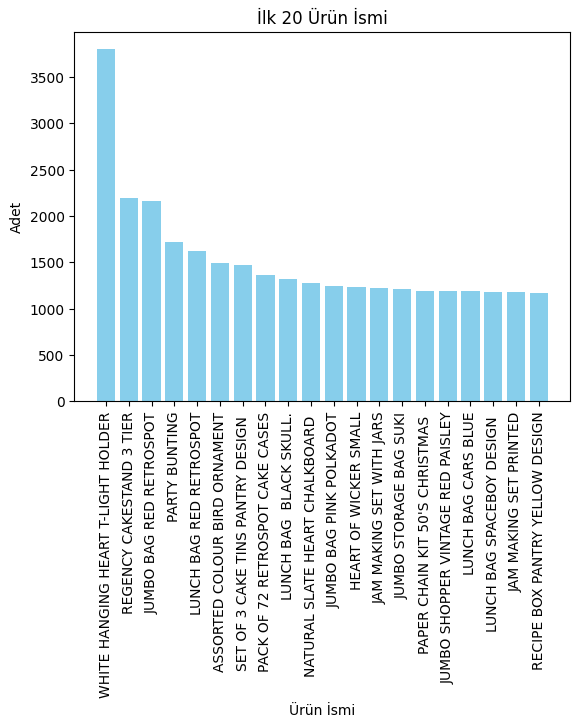

In [ ]:
import matplotlib.pyplot as plt

# İlk 20 ürün ismini alın
top_20_product_names = df['Description'].value_counts().head(20)

# Çubuk grafik oluşturun
plt.bar(top_20_product_names.index, top_20_product_names.values, color='skyblue')
plt.title('İlk 20 Ürün İsmi')
plt.xlabel('Ürün İsmi')
plt.ylabel('Adet')
plt.xticks(rotation=90)
plt.show()

Buradan gördüğümüz üzere ürünlerimiz genel olarak büyük harfle yazılmış gibiduruyor. Şimdi bu bizim veri setimiz için bir standart olabilir ama şu ana kadar birçok anormallikle karşılaştığımız için diğer ürünler için de harf kontrolü yapmak mantıklı olacaktır.

In [ ]:
anormal_urun_var = False
for product_name in df['Description'].unique():
    if not product_name.isupper():
        print(product_name)
        anormal_urun_var = True

if not anormal_urun_var:
    print("Anormal ürün bulunamadı.")

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
BAG 125g SWIRLY MARBLES
BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Dr. Jam's Arouzer Stress Ball
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
amazon
FOLK ART GREETING CARD,pack/12
?
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
check
damages
Dad's Cab Electronic Meter
NUMBER TILE VINTAGE FONT No 
*Boombox Ipod Classic
faulty
Dotcom sales
amazon sales
*USB Office Mirror Ball
POLYESTER FILLER PAD 30CMx30CM
Found
reverse 21/5/10 adjustment
mouldy, thrown away.
found
counted
Given away
Dotcom
label mix up
samples/damages
thrown away
incorrectly made-thrown away.
showroom
Adjustment
Dotcom set
wrongly sold as sets
Amazon sold sets
dotcom sold sets
wrongly sold sets
? sold as sets?
?sold as sets?
Thrown away.
damages/display
damaged stock
broken
throw away
wrong barcode (22467)
wrongly sold (22719) barcode
wrong barcode
barcode pr

In [ ]:
# Anormal ürünleri bulmak için kullanılacak değişken
anormal_urun_var = False

# Anormal ürünleri bul
for product_name in df['Description'].unique():
    if not product_name.isupper():
        print(f"Anormal ürün bulundu: {product_name}")
        anormal_urun_var = True

# Eğer hiç anormal ürün bulunamadıysa
if not anormal_urun_var:
    print("Anormal ürün bulunamadı.")
else:
    # Anormal ürünleri içeren satırları seç
    df = df[df['Description'].apply(lambda x: not x.isupper())]

    # Belirli ürünler dışındaki satırları kaldır
    korunan_urunler = [
      'BAG 500g SWIRLY MARBLES',
      'POLYESTER FILLER PAD 45x45cm',
      'BAG 125g SWIRLY MARBLES',
      'BAG 250g SWIRLY MARBLES',
      'POLYESTER FILLER PAD 45x30cm',
      'POLYESTER FILLER PAD 40x40cm',
      'FRENCH BLUE METAL DOOR SIGN No',
      "Dr. Jam's Arouzer Stress Ball",
      '3 TRADITIONAl BISCUIT CUTTERS  SET',
      'FOLK ART GREETING CARD,pack/12',
      'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
      'POLYESTER FILLER PAD 65CMx65CM',
      '*USB Office Mirror Ball',
      'POLYESTER FILLER PAD 30CMx30CM',
      'Dotcom set',
      'POLYESTER FILLER PAD 60x40cm',
      'FLOWERS HANDBAG blue and orange',
      'dotcom',
      'Dotcom',
      'THE KING GIFT BAG 25x24x12cm',
      'Dotcomgiftshop Gift Voucher £100.00'
    ]

    df = df[df['Description'].isin(korunan_urunler)]

    # Filtrelenmiş DataFrame'i göster
    print("\nSadece korunan anormal ürünleri içeren satırlar:")
    print(df)

Anormal ürün bulundu: BAG 500g SWIRLY MARBLES
Anormal ürün bulundu: POLYESTER FILLER PAD 45x45cm
Anormal ürün bulundu: BAG 125g SWIRLY MARBLES
Anormal ürün bulundu: BAG 250g SWIRLY MARBLES
Anormal ürün bulundu: POLYESTER FILLER PAD 45x30cm
Anormal ürün bulundu: POLYESTER FILLER PAD 40x40cm
Anormal ürün bulundu: FRENCH BLUE METAL DOOR SIGN No
Anormal ürün bulundu: Dr. Jam's Arouzer Stress Ball
Anormal ürün bulundu: 3 TRADITIONAl BISCUIT CUTTERS  SET
Anormal ürün bulundu: NUMBER TILE COTTAGE GARDEN No
Anormal ürün bulundu: amazon
Anormal ürün bulundu: FOLK ART GREETING CARD,pack/12
Anormal ürün bulundu: ?
Anormal ürün bulundu: ESSENTIAL BALM 3.5g TIN IN ENVELOPE
Anormal ürün bulundu: POLYESTER FILLER PAD 65CMx65CM
Anormal ürün bulundu: check
Anormal ürün bulundu: damages
Anormal ürün bulundu: Dad's Cab Electronic Meter
Anormal ürün bulundu: NUMBER TILE VINTAGE FONT No 
Anormal ürün bulundu: *Boombox Ipod Classic
Anormal ürün bulundu: faulty
Anormal ürün bulundu: Dotcom sales
Anormal ürün

In [ ]:
df['Description'] = df['Description'].apply(lambda x: ''.join(e for e in x if e.isalnum() or e.isspace()))

In [ ]:
anormal_urun_var = False
for product_name in df['Description'].unique():
    if not product_name.isupper():
        print(product_name)
        anormal_urun_var = True

if not anormal_urun_var:
    print("Anormal ürün bulunamadı.")

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
BAG 125g SWIRLY MARBLES
BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
Dr Jams Arouzer Stress Ball
3 TRADITIONAl BISCUIT CUTTERS  SET
FOLK ART GREETING CARDpack12
ESSENTIAL BALM 35g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
USB Office Mirror Ball
POLYESTER FILLER PAD 30CMx30CM
Dotcom
Dotcom set
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
dotcom
THE KING GIFT BAG 25x24x12cm
Dotcomgiftshop Gift Voucher 10000


In [ ]:
# Ürün isimlerini büyük harfe dönüştürme
df['Description'] = df['Description'].str.upper()

Bu  çıktıdan çıkarım yapalım. Öncelikle ürün olmayan 'CRUK Commission,
High Resolution Image, Next Day Carriage, Bank Charges' gibi şeyler var. Bunları ürün öneri sisteminde kullanmak mantıksız olacağı için ürün değiller çünkü çıkarmak geriye kalanları ise verinin çoğunluğuna uydurmak en mantıklısı. Bu nedenle ürün olmayanları çıkarıp diğer ürünlerin de tüm harflerini büyük harfe çevireceğim.

In [ ]:
anormal_urun_var = False
for product_name in df['Description'].unique():
    if not product_name.isupper():
        print(product_name)
        anormal_urun_var = True

if not anormal_urun_var:
    print("Anormal ürün bulunamadı.")

Anormal ürün bulunamadı.


# 6) Ücreti 0 Olanları Düzenleme


Ücreti 0 olan satırlar genellikle veri setindeki hatalı ya da eksik bilgileri temsil eder. Bir ürünün ücretinin 0 olması doğru değildir çünkü herhangi bir ürün üretim, stoklama veya taşıma maliyetine sahiptir. Bu nedenle, ücreti 0 olan satırlar genellikle yanlışlıkla veya eksik veri girişi sonucu oluşmuş olabilir.Ayrıca, ücreti 0 olan satırlar analiz ve modelleme süreçlerinde yanıltıcı olabilir. Bu nedenle ilerleyen aşamalarda sorun yaşamamak için ücreti '0' olanlar varsa bunları veri setinde çıkartacağım.

In [ ]:
# Ücreti 0 olan satırların sayısını bulma
zero_price_count = len(df[df['UnitPrice'] == 0])

# Sayıyı ekrana yazdırma
print("Ücreti 0 olan satırların sayısı:", zero_price_count)

Ücreti 0 olan satırların sayısı: 25


In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,25.000000
mean,32.920000
std,194.294433
min,-675.000000
25%,2.000000
50%,20.000000
75%,140.000000
max,320.000000


In [ ]:
# Ücreti 0 olan satırları bulma
zero_price_rows = df[df['UnitPrice'] == 0]

# Bulunan satırları veri setinden çıkarma
df = df.drop(zero_price_rows.index)

In [ ]:
# Ücreti 0 olan satırların sayısını bulma
zero_price_count = len(df[df['UnitPrice'] == 0])

# Sayıyı ekrana yazdırma
print("Ücreti 0 olan satırların sayısı:", zero_price_count)

Ücreti 0 olan satırların sayısı: 0


In [ ]:
# Temizlenmiş veri kümesinin dizinini sıfırlama
df.reset_index(drop=True, inplace=True)

In [ ]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
# İptal edilen işlemlerin yüzdesini bulma
cancelled_percentage = (cancelled_transactions .shape[0] / df.shape[0]) * 100

# İptal edilen işlemlerin yüzdesini yazdırma
print(f"Veri kümesindeki iptal edilen işlemlerin yüzdesi:  {cancelled_percentage:.2f}%")

Veri kümesindeki iptal edilen işlemlerin yüzdesi:  1.54%


# **DATA CLEANING END**

In [ ]:
df.to_csv('data_cleaning.csv')

# **FEATURE ENGINEERING START**

# 1) RFM


RFM, "Recency, Frequency, Monetary" kelimelerinin baş harflerinden oluşan bir müşteri segmentasyon yöntemidir. Bu yöntem, müşterileri davranışlarına göre segmentlere ayırmak ve bu segmentlere özgü pazarlama stratejileri oluşturmak için kullanılır. RFM analizi, her müşterinin üç ana kriter olan Recency (Yenilik), Frequency (Sıklık) ve Monetary (Parasal Değer) özelliklerine dayanır.

Recency (Yenilik): Müşterinin son satın almasından bu yana geçen süredir. Bu kriterde daha yakın zamanda satın alan müşteriler daha yüksek bir puan alır.

Frequency (Sıklık): Belirli bir zaman diliminde müşterinin yaptığı toplam satın alma sayısıdır. Sıklık arttıkça müşterinin puanı da artar.

Monetary (Parasal Değer): Müşterinin toplam harcadığı para miktarıdır. Daha yüksek miktarlarda harcama yapan müşteriler daha yüksek bir puan alır.

A) Recency(R)

Uygulayacağım mantık --> Son Satın Almadan Bu Yana Geçen Günler: Bu özellik, müşterinin son satın alma işleminden bu yana geçen gün sayısını temsil eder. Daha düşük bir değer, müşterinin yakın zamanda alışveriş yaptığını ve işletmeyle daha yüksek bir bağlılık düzeyine sahip olduğunu gösterirken, daha yüksek bir değer bir duraklamaya veya azalan bağlılığa işaret edebilir.

In [ ]:
# InvoiceDate'i datetime türüne dönüştür. Bu işlem, satın alma tarihlerinin uygun formatta saklanmasını sağlar.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# InvoiceDate'i datetime'a dönüştürün ve yalnızca tarihi çıkarın.
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Her müşteri için en son satın alma tarihini bulun
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

"""Tüm veri kümesindeki en son tarihi buluyoruz. Bu sayede en son tarihten her müşterinin en son satın alma tarihini çıkarıcaz.Daha düşük bir değer, müşterinin yakın zamanda alışveriş
yaptığını daha büyük değer ise uzun zaman önce alışveriş yaptığını göstericek. """

most_recent_date = df['InvoiceDay'].max()

# Çıkarma işleminden önce InvoiceDay'i datetime türüne dönüştürün
customer_data['InvoiceDay']= pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Her müşteri için son satın alma işleminden bu yana geçen gün sayısını hesaplayın
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# InvoiceDay sütununu kaldırın
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [ ]:
customer_data.head(100)

,CustomerID,Days_Since_Last_Purchase
0,12362.0,3
1,12378.0,129
2,12381.0,119
3,12383.0,331
4,12395.0,357
...,...,...
95,13309.0,7
96,13317.0,198
97,13340.0,134
98,13350.0,79


b) Frequency (F)

Uygulayacağım mantık --> Bu adımda, bir müşterinin perakendeciyle etkileşim sıklığını ölçen iki özellik oluşturacağım:

Toplam İşlemler: Bu özellik, bir müşteri tarafından yapılan toplam işlem sayısını temsil eder. Bir müşterinin perakendeciyle olan etkileşim düzeyini anlamaya yardımcı olur.

Satın Alınan Toplam Ürün: Bu özellik, bir müşteri tarafından tüm işlemlerde satın alınan toplam ürün sayısını (miktarların toplamı) gösterir. Satın alınan ürünlerin hacmi açısından müşterinin satın alma davranışı hakkında bir fikir verir.

In [ ]:
# Her bir müşteri tarafından yapılan toplam işlem sayısını hesaplayın
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Her bir müşteri tarafından satın alınan toplam ürün sayısını hesaplayın
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Yeni özellikleri customer_data veri çerçevesiyle birleştirin
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

In [ ]:
customer_data.head(100)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12362.0,3,1,12
1,12378.0,129,1,6
2,12381.0,119,1,6
3,12383.0,331,2,18
4,12395.0,357,1,2
...,...,...,...,...
95,13309.0,7,1,24
96,13317.0,198,1,8
97,13340.0,134,1,48
98,13350.0,79,1,4


c) Monetary (M)

Bu adımda müşteri işlemlerinin parasal yönünü temsil eden iki özellik oluşturacağım:

Toplam Harcama: Bu özellik, her müşterinin harcadığı toplam para miktarını temsil eder. Müşterinin yaptığı tüm işlemler için BirimFiyat ve Adet çarpımının toplamı olarak hesaplanır. Bu özellik, müşterinin işletme için değerinin doğrudan bir göstergesi olan, her müşterinin ürettiği toplam gelirin belirlenmesine yardımcı olduğu için çok önemlidir.
Ortalama İşlem Değeri: Bu özellik, her müşteri için Toplam Harcamanın Toplam İşlemlere bölünmesiyle hesaplanır. Müşteri tarafından gerçekleştirilen bir işlemin ortalama değerini gösterir. Bu ölçüm, müşterilerin işlem başına harcama davranışlarını anlamada kullanışlıdır ve ortalama harcama kalıplarına göre farklı müşteri segmentlerine yönelik pazarlama stratejileri ve tekliflerin uyarlanmasına yardımcı olabilir.

In [ ]:
# Her bir müşterinin toplam harcamasını hesaplayın
df['Total_Spend'] = df['UnitPrice'] * df['Quantity'] #ürün fiyatı x satın alınan miktar
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Her müşteri için ortalama işlem değerini hesaplayın
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')# total_spend veri çerçevesi ile total_transactions veri çerçevesini CustomerID
# sütunu üzerinden birleştiriyoruz (merge() fonksiyonu ile). Bu sayede her müşterinin toplam harcamasını (Total_Spend) ve toplam işlem sayısını (Total_Transactions) içeren bir veri çerçevesi elde ediyoruz.
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions'] # Daha sonra bu birleştirilmiş veri çerçevesi üzerinden her müşteri için ortalama işlem değerini (Average_Transaction_Value) hesaplıyoruz.
# Ortalama işlem değeri, müşterinin toplam harcaması (Total_Spend) ile yaptığı işlem sayısı (Total_Transactions) arasındaki bölme işlemiyle hesaplanıyor (Total_Spend / Total_Transactions).

# Yeni özellikleri customer_data veri çerçevesiyle birleştirin
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

In [ ]:
customer_data.head(100)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12362.0,3,1,12,10.20,10.20
1,12378.0,129,1,6,12.60,12.60
2,12381.0,119,1,6,12.60,12.60
3,12383.0,331,2,18,17.64,8.82
4,12395.0,357,1,2,2.50,2.50
...,...,...,...,...,...,...
95,13309.0,7,1,24,10.08,10.08
96,13317.0,198,1,8,12.40,12.40
97,13340.0,134,1,48,88.80,88.80
98,13350.0,79,1,4,5.80,5.80


# 2) Satın Alınan Ürün Çeşitliliğini İnceleme

Bu adımda müşterilerin ürün satın alma davranışlarındaki çeşitliliği bakıyorum.Yani çeşit çeşit ürün mü alıyor, yoksa daha benzer çeşitler mi alıyor? Daha yüksek bir değer, müşterinin geniş bir ürün yelpazesi satın alarak farklı bir zevke veya tercihe sahip olduğunu gösterirken, daha düşük bir değer, odaklanmış veya spesifik bir tercihi gösterebilir.

In [ ]:
# Her müşterinin satın aldığı benzersiz ürün sayısını hesapla--> Bu özellik, bir müşterinin satın aldığı farklı ürünlerin sayısını temsil eder.
Unique_Products_Purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
#nunique(): Her müşterinin satın aldığı farklı (unique) ürünlerin sayısını hesaplıyoruz.
#reset_index(): Sonuçları sıfırdan indeksleyerek (CustomerID'ye göre gruplanmış benzersiz ürün sayıları) yeni bir veri çerçevesi oluşturuyoruz.
Unique_Products_Purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True) #  'StockCode' sütununu 'Unique_Products_Purchased' olarak yeniden adlandırır. Bu adım, daha anlaşılır bir sütun adı sağlar.
# Müşteri veri setine yeni özelliği ekle
customer_data = pd.merge(customer_data, Unique_Products_Purchased, on='CustomerID', how='left')

# İlk birkaç satırı kontrol et
customer_data.head()



,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12362.0,3,1,12,10.20,10.20,1
1,12378.0,129,1,6,12.60,12.60,1
2,12381.0,119,1,6,12.60,12.60,1
3,12383.0,331,2,18,17.64,8.82,2
4,12395.0,357,1,2,2.50,2.50,1


# 3)Satın Alma Davranışlarını İnceleme

Bu adımda müşterilerin alışveriş kalıplarını ve davranışlarını anlamayı ve yakalamak hedefimiz. Bu özellikler bize müşterilerin ne zaman alışveriş yapmayı sevdiklerine ilişkin tercihleri hakkında bilgi verecek ve bu, alışveriş deneyimlerini kişiselleştirmek için çok önemli bilgiler olabilecek. Bu yüzden en çok hangi gün alışveriş yapıyorlar, hangi saatte yapıyorlar ve alışveriş yaptıkları günler arası ne kadar bunları ele alıyorum.

In [ ]:
# 1. Satın alma işlemleri arasındaki ortalama gün sayısı
# Müşterilerin her bir satın alma işlemi arasındaki gün farklarını hesaplayalım
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Next_InvoiceDate'] = df.groupby('CustomerID')['InvoiceDate'].shift(-1) #her müşteri için satın alma tarihlerini gruplandırır ve ardışık satın alma tarihlerini bir sonraki satırın tarihine kaydırır. Bu şekilde her bir satırın altında müşterinin bir sonraki satın alma tarihi bulunur.
df['Days_Between_Purchases'] = (df['Next_InvoiceDate'] - df['InvoiceDate']).dt.days

average_days_between_purchases = df.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
average_days_between_purchases.rename(columns={'Days_Between_Purchases': 'Average_Days_Between_Purchases'}, inplace=True)

# Müşteri veri setine yeni özelliği ekleyelim
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID', how='left')

# 2. Favori alışveriş gününü belirleme
# Müşterilerin en çok alışveriş yaptığı günü bulalım
df['Day_of_Week'] = df['InvoiceDate'].dt.day_name()
favorite_shopping_day = df.groupby('CustomerID')['Day_of_Week'].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_shopping_day.rename(columns={'Day_of_Week': 'Favorite_Shopping_Day'}, inplace=True)


# Müşteri veri setine yeni özelliği ekleyelim
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID', how='left')

# 3. Favori alışveriş saati belirleme
# Müşterilerin en çok alışveriş yaptığı saati bulalım
df['Hour_of_Day'] = df['InvoiceDate'].dt.hour
favorite_shopping_hour = df.groupby('CustomerID')['Hour_of_Day'].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_shopping_hour.rename(columns={'Hour_of_Day': 'Favorite_Shopping_Hour'}, inplace=True)

# Müşteri veri setine yeni özelliği ekleyelim
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID', how='left')

# İlk birkaç satırı kontrol edelim
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour
0,12362.0,3,1,12,10.20,10.20,1,NaN,Tuesday,15
1,12378.0,129,1,6,12.60,12.60,1,NaN,Tuesday,10
2,12381.0,119,1,6,12.60,12.60,1,NaN,Friday,9
3,12383.0,331,2,18,17.64,8.82,2,20.0,Wednesday,14
4,12395.0,357,1,2,2.50,2.50,1,NaN,Friday,16


In [ ]:
# Günleri sayısal değerlere dönüştürmek için bir eşleme oluşturalım
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Günlerin sayısal değerlerini içeren yeni bir sütun oluşturalım
df['Day_of_Week_Numeric'] = df['Day_of_Week'].map(day_mapping)

# Favori alışveriş gününü hesaplarken bu yeni sayısal sütunu kullanabiliriz
favorite_shopping_day = df.groupby('CustomerID')['Day_of_Week_Numeric'].agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_shopping_day.rename(columns={'Day_of_Week_Numeric': 'Favorite_Shopping_Day_Numeric'}, inplace=True)

# Müşteri veri setine yeni özelliği ekleyelim
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID', how='left')
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric
0,12362.0,3,1,12,10.20,10.20,1,NaN,Tuesday,15,1
1,12378.0,129,1,6,12.60,12.60,1,NaN,Tuesday,10,1
2,12381.0,119,1,6,12.60,12.60,1,NaN,Friday,9,4
3,12383.0,331,2,18,17.64,8.82,2,20.0,Wednesday,14,2
4,12395.0,357,1,2,2.50,2.50,1,NaN,Friday,16,4


# 4)Müşterilerin Coğrafi Dağılımı İnceleme

Müşterilerimizin coğrafi konumları da satın alma stratejilerimize önemli noktada etki ettiği için bunu da incelemeye alıyorum.

In [ ]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.935048
EIRE              0.019936
France            0.012862
Germany           0.006431
Belgium           0.005788
Name: proportion, dtype: float64

Çıkarım yaparsak eğer veri setindeki işlemlerin önemli bir kısmı (%89) Birleşik Krallık'tan kaynaklanmaktadır. Bu nedenle, müşterilerin Birleşik Krallık'tan olup olmadığını belirlemek, pazarlama stratejilerini ve lojistik operasyonlarını bu ana pazar odaklı olarak şekillendirmek için önemlidir. Bu nedenle birleşik krallık ya da değil diye bir strateji uygulayacağız..

In [ ]:
# Müşteri kimliği ve ülkeye göre işlem sayısını hesapla
transactions_per_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Transaction_Count')

# Her müşteri için en fazla işlem yapılan ülkeyi belirle
max_transactions_per_customer = transactions_per_country.groupby('CustomerID')['Transaction_Count'].max().reset_index()
max_transactions_per_customer.rename(columns={'Transaction_Count': 'Max_Transactions'}, inplace=True)

# Birleşik Krallık'tan işlem yapmış olan müşterileri belirle
uk_customers = transactions_per_country[transactions_per_country['Country'] == 'United Kingdom']['CustomerID'].unique()
uk_customers_df = pd.DataFrame({'CustomerID': uk_customers, 'UK_Customer': 1})

# Tüm müşteriler için Birleşik Krallık'tan olup olmadığını gösteren sütunu oluştur
customer_geography = pd.merge(max_transactions_per_customer, uk_customers_df, on='CustomerID', how='left')
customer_geography['UK_Customer'].fillna(0, inplace=True)

# Özelliklerin birleştirilmiş veri çerçevesine eklenmesi
customer_geography.head(100)

,CustomerID,Max_Transactions,UK_Customer
0,12362.0,1,0.0
1,12378.0,1,0.0
2,12381.0,1,0.0
3,12383.0,2,0.0
4,12395.0,1,0.0
...,...,...,...
95,13309.0,1,1.0
96,13317.0,1,1.0
97,13340.0,1,1.0
98,13350.0,1,1.0


In [ ]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
# İptal edilen işlemlerin yüzdesini bulma
cancelled_percentage = (cancelled_transactions .shape[0] / df.shape[0]) * 100

# İptal edilen işlemlerin yüzdesini yazdırma
print(f"Veri kümesindeki iptal edilen işlemlerin yüzdesi:  {cancelled_percentage:.2f}%")
# İptal edilen işlemleri içeren DataFrame'i gösterme
print("İptal edilen işlemleri içeren DataFrame:")
print(cancelled_transactions)


Veri kümesindeki iptal edilen işlemlerin yüzdesi:  1.54%
İptal edilen işlemleri içeren DataFrame:
     InvoiceNo StockCode                         Description  Quantity  \
74     C538768     22686      FRENCH BLUE METAL DOOR SIGN NO       -12   
165    C542150     21703             BAG 125G SWIRLY MARBLES        -1   
214    C544118     21705             BAG 500G SWIRLY MARBLES       -12   
249    C545068    84247K        FOLK ART GREETING CARDPACK12       -11   
427    C551316     21703             BAG 125G SWIRLY MARBLES       -12   
514    C553854     21703             BAG 125G SWIRLY MARBLES        -1   
566    C555636     22686      FRENCH BLUE METAL DOOR SIGN NO       -12   
597    C556647     21703             BAG 125G SWIRLY MARBLES       -12   
603    C557142     22965  3 TRADITIONAL BISCUIT CUTTERS  SET       -12   
619    C557663     22965  3 TRADITIONAL BISCUIT CUTTERS  SET       -12   
639    C558327    46000S        POLYESTER FILLER PAD 40X40CM       -24   
640    C558329

In [ ]:
customer_data = pd.merge(customer_data, customer_geography[['CustomerID', 'UK_Customer']], on='CustomerID', how='left')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer
0,12362.0,3,1,12,10.20,10.20,1,NaN,Tuesday,15,1,0.0
1,12378.0,129,1,6,12.60,12.60,1,NaN,Tuesday,10,1,0.0
2,12381.0,119,1,6,12.60,12.60,1,NaN,Friday,9,4,0.0
3,12383.0,331,2,18,17.64,8.82,2,20.0,Wednesday,14,2,0.0
4,12395.0,357,1,2,2.50,2.50,1,NaN,Friday,16,4,0.0


In [ ]:
customer_data['UK_Customer'].value_counts()

UK_Customer
1.0    621
0.0     56
Name: count, dtype: int64

# 5) İptal İşlemlerinin Sıklığını Ele Alma

Bu adımda, müşteri segmentasyon modelimizi geliştirebilecek bilgiler elde etmek için müşterilerin iptal kalıplarını daha derinlemesine inceliyorum.

In [ ]:
# İptal işlemlerini filtreleme
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# İptal sıklığı: Her müşterinin iptal ettiği toplam işlem sayısı
cancel_frequency = cancelled_transactions.groupby('CustomerID').size()

# Toplam işlem sayısı
total_process = df.groupby('CustomerID').size()

# İptal oranı: Tüm işlemler içerisinde iptal edilen işlemlerin oranı
cancel_rate = cancel_frequency /total_process

# Sonuçları birleştirme
cancel_info = pd.DataFrame({
    'Cancel_Frequency': cancel_frequency,
    'Total_Process ': total_process ,
    'Cancel_Rate': cancel_rate
}).fillna(0)  # NaN değerleri 0 ile doldurma

cancel_info.head(100)


,Cancel_Frequency,Total_Process,Cancel_Rate
CustomerID,,,
12362.0,0.0,1,0.0
12378.0,0.0,1,0.0
12381.0,0.0,1,0.0
12383.0,0.0,2,0.0
12395.0,0.0,1,0.0
...,...,...,...
13309.0,0.0,1,0.0
13317.0,0.0,1,0.0
13340.0,0.0,1,0.0


In [ ]:
# Cancel_Rate sütunu 0 olmayan iptal işlemlerini göster
cancel_info[cancel_info['Cancel_Rate'] > 0]

,Cancel_Frequency,Total_Process,Cancel_Rate
CustomerID,,,
12678.0,1.0,2,0.500000
12709.0,1.0,2,0.500000
12994.0,1.0,3,0.333333
13012.0,1.0,3,0.333333
13364.0,1.0,2,0.500000
14049.0,1.0,4,0.250000
14157.0,1.0,2,0.500000
14493.0,1.0,2,0.500000
14606.0,1.0,9,0.111111


In [ ]:
customer_data = pd.merge(customer_data, cancel_info, on='CustomerID', how='left')
customer_data.head(100)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate
0,12362.0,3,1,12,10.20,10.20,1,NaN,Tuesday,15,1,0.0,0.0,1,0.0
1,12378.0,129,1,6,12.60,12.60,1,NaN,Tuesday,10,1,0.0,0.0,1,0.0
2,12381.0,119,1,6,12.60,12.60,1,NaN,Friday,9,4,0.0,0.0,1,0.0
3,12383.0,331,2,18,17.64,8.82,2,20.0,Wednesday,14,2,0.0,0.0,2,0.0
4,12395.0,357,1,2,2.50,2.50,1,NaN,Friday,16,4,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13309.0,7,1,24,10.08,10.08,1,NaN,Friday,16,4,1.0,0.0,1,0.0
96,13317.0,198,1,8,12.40,12.40,1,NaN,Wednesday,10,2,1.0,0.0,1,0.0
97,13340.0,134,1,48,88.80,88.80,1,NaN,Thursday,15,3,1.0,0.0,1,0.0
98,13350.0,79,1,4,5.80,5.80,1,NaN,Wednesday,13,2,1.0,0.0,1,0.0


Bu iptal öngörülerini veri kümemize dahil ederek, müşteri davranışına ilişkin daha kapsamlı bir görünüm oluşturabiliriz. Bu, potansiyel olarak daha etkili ve incelikli müşteri segmentasyonu oluşturmaya yardımcı olabilir. Yani iptal etme oranı fazla olanlar için daha mennun olabileceği şekilde bir sistem geliştirip memnun olmasını sağlayabiliriz.

# 6) Trendleri Ele Alma


Müşterilerin harcama trendlerini analiz etmek, alışveriş davranışlarının zaman içindeki değişimlerini belirleyerek pazarlama stratejilerini ayarlamak ve müşteri memnuniyetini artırmak için önemlidir.

In [ ]:
from scipy.stats import linregress

# InvoiceDate'ten ayı ve yılı çıkartın
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Her müşteri için aylık harcamayı hesaplayın
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Sezonluk Satın Alma Modellerini Hesaplayın: Sezonluk satın alma modellerinin temsili olarak aylık sıklığı kullanılıyor..
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Monthly_Spending_Std'deki NaN değerlerini 0 ile değiştirin; bu, tek işlem ayına sahip müşteriler için hiçbir değişkenlik olmadığı anlamına gelir..
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Harcama Eğilimlerini Hesaplayın. Harcama eğilimlerinin bir göstergesi olarak müşterinin zaman içindeki harcamalarına uygun doğrusal eğilim çizgisinin eğimini kullanıyoruz..
def calculate_trend(spend_data):
    # Birden fazla veri noktası varsa trendi doğrusal regresyon kullanarak hesaplarız
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
  # Yalnızca tek bir veri noktası varsa hiçbir eğilim hesaplanamaz, dolayısıyla 0 döndürürüz
    else:
        return 0

# Her müşterinin harcama eğilimini bulmak için spending_trends işlevini uygulayın
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Yeni özellikleri customer_data veri çerçevesiyle birleştirin
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12362.0,3,1,12,10.20,10.20,1,NaN,Tuesday,15,1,0.0,0.0,1,0.0,10.20,0.000000,0.00
1,12378.0,129,1,6,12.60,12.60,1,NaN,Tuesday,10,1,0.0,0.0,1,0.0,12.60,0.000000,0.00
2,12381.0,119,1,6,12.60,12.60,1,NaN,Friday,9,4,0.0,0.0,1,0.0,12.60,0.000000,0.00
3,12383.0,331,2,18,17.64,8.82,2,20.0,Wednesday,14,2,0.0,0.0,2,0.0,8.82,5.345727,7.56
4,12395.0,357,1,2,2.50,2.50,1,NaN,Friday,16,4,0.0,0.0,1,0.0,2.50,0.000000,0.00


In [ ]:
customer_data = customer_data.drop(columns=['Favorite_Shopping_Day'])
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12362.0,3,1,12,10.20,10.20,1,NaN,15,1,0.0,0.0,1,0.0,10.20,0.000000,0.00
1,12378.0,129,1,6,12.60,12.60,1,NaN,10,1,0.0,0.0,1,0.0,12.60,0.000000,0.00
2,12381.0,119,1,6,12.60,12.60,1,NaN,9,4,0.0,0.0,1,0.0,12.60,0.000000,0.00
3,12383.0,331,2,18,17.64,8.82,2,20.0,14,2,0.0,0.0,2,0.0,8.82,5.345727,7.56
4,12395.0,357,1,2,2.50,2.50,1,NaN,16,4,0.0,0.0,1,0.0,2.50,0.000000,0.00


In [ ]:
# 'MüşteriKimliği'nin veri türü, benzersiz bir tanımlayıcı olduğundan ve matematiksel işlemlerde kullanılmadığından dize olarak değiştiriliyor
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Sütunların veri türlerini optimum türlere dönüştürün
customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head(2000)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12362.0,3,1,12,10.2,10.2,1,<NA>,15,1,0,0,1,0.0,10.2,0.0,0.0
1,12378.0,129,1,6,12.6,12.6,1,<NA>,10,1,0,0,1,0.0,12.6,0.0,0.0
2,12381.0,119,1,6,12.6,12.6,1,<NA>,9,4,0,0,1,0.0,12.6,0.0,0.0
3,12383.0,331,2,18,17.64,8.82,2,20.0,14,2,0,0,2,0.0,8.82,5.345727,7.56
4,12395.0,357,1,2,2.5,2.5,1,<NA>,16,4,0,0,1,0.0,2.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,18224.0,263,1,12,10.2,10.2,1,<NA>,10,0,1,0,1,0.0,10.2,0.0,0.0
673,18226.0,44,2,15,14.75,7.375,3,38.0,13,2,1,0,3,0.0,7.375,3.995153,-5.65
674,18231.0,240,1,12,15.0,15.0,1,<NA>,9,2,1,0,1,0.0,15.0,0.0,0.0
675,18241.0,217,1,6,12.6,12.6,1,<NA>,9,4,1,0,1,0.0,12.6,0.0,0.0


7) Yeni Datada Eksik ve Yinelenen Değerleri Ele Alma

In [ ]:
missing_values = customer_data.isnull().sum()

In [ ]:
missing_values_percent = (missing_values  / len(customer_data)) * 100
print(missing_values_percent)

CustomerID                         0.000000
Days_Since_Last_Purchase           0.000000
Total_Transactions                 0.000000
Total_Products_Purchased           0.000000
Total_Spend                        0.000000
Average_Transaction_Value          0.000000
Unique_Products_Purchased          0.000000
Average_Days_Between_Purchases    62.629247
Favorite_Shopping_Hour             0.000000
Favorite_Shopping_Day_Numeric      0.000000
UK_Customer                        0.000000
Cancel_Frequency                   0.000000
Total_Process                      0.000000
Cancel_Rate                        0.000000
Monthly_Spending_Mean              0.000000
Monthly_Spending_Std               0.000000
Spending_Trend                     0.000000
dtype: float64


In [ ]:
customer_data['Average_Days_Between_Purchases'].fillna(customer_data['Average_Days_Between_Purchases'].median(), inplace=True)


In [ ]:
nan_sayisi = customer_data.isnull().sum().sum()

print("Temizlenmiş DataFrame'deki NaN Değer Sayısı:", nan_sayisi)

Temizlenmiş DataFrame'deki NaN Değer Sayısı: 0


yinelenen satırlar:

In [ ]:
# Yinelenen satırları bulalım
duplicate_rows = customer_data[customer_data.duplicated()]

if not duplicate_rows.empty:
    print("Yinelenen Satırlar:")
    print(duplicate_rows)
else:
    print("Yinelenen Satır Bulunmuyor.")

Yinelenen Satır Bulunmuyor.


In [ ]:
customer_data.to_csv('feature_engineering.csv')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12362.0,3,1,12,10.2,10.2,1,38.0,15,1,0,0,1,0.0,10.2,0.0,0.0
1,12378.0,129,1,6,12.6,12.6,1,38.0,10,1,0,0,1,0.0,12.6,0.0,0.0
2,12381.0,119,1,6,12.6,12.6,1,38.0,9,4,0,0,1,0.0,12.6,0.0,0.0
3,12383.0,331,2,18,17.64,8.82,2,20.0,14,2,0,0,2,0.0,8.82,5.345727,7.56
4,12395.0,357,1,2,2.5,2.5,1,38.0,16,4,0,0,1,0.0,2.5,0.0,0.0


# **FEATURE ENGINEERING END**

In [ ]:
customer_data.to_csv('feature_enginering.csv')

# **OUTLITER ANALYST START**

Verilerim çok boyutlu olduğu için özellikle çok boyutlu veri setlerinde etkili olan bir aykırı değer tespit algoritması kullanmam mantıklı olacak. Bu nedenle Isolation Forest algoritmasını kullanacağım.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


# Isolation Forest modelini oluşturalım
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Modeli eğitelim ve aykırı değerleri tespit edelim
outlier_preds = isolation_forest.fit_predict(customer_data)

# Aykırı değerlerin indekslerini alalım
outlier_indices = np.where(outlier_preds == -1)[0]

# Aykırı değerlerin sayısını hesaplayalım
outlier_count = len(outlier_indices)

# Tüm veri noktalarının sayısını alalım
total_data_points = len(customer_data)

# Aykırı değerlerin yüzdesini hesaplayalım
outlier_percentage = (outlier_count / total_data_points) * 100

# Aykırı değerlerin yüzdesini ekrana yazdıralım
print(f"Tüm aykırılıkların veri setindeki yüzdesi: {outlier_percentage:.2f}%")



Tüm aykırılıkların veri setindeki yüzdesi: 8.12%


In [ ]:
# Aykırı değerleri ayrı bir veri çerçevesine atama
outliers_data = customer_data.iloc[outlier_indices]

# Ana veri setinden aykırı değerleri çıkarma
cleaned_customer_data = customer_data.drop(index=outlier_indices)



In [ ]:
# Aykırı değerlerin yüzdesini hesaplama
outlier_percentage = (len(outliers_data) / len(customer_data)) * 100

# Temizlenmiş veri setindeki aykırı olmayan verilerin yüzdesini hesaplama
cleaned_percentage = (len(cleaned_customer_data) / len(customer_data)) * 100

# Sonuçları yazdırma
print(f"Aykırı değerlerin tüm veri setindeki yüzdesi: {outlier_percentage:.2f}%")
print(f"Temizlenmiş veri setinde kalan verilerin yüzdesi: {cleaned_percentage:.2f}%")


Aykırı değerlerin tüm veri setindeki yüzdesi: 8.12%
Temizlenmiş veri setinde kalan verilerin yüzdesi: 91.88%


In [ ]:
# Temizlenmiş veri setinde aykırı değer var mı kontrol edelim
if cleaned_customer_data.isin(outliers_data).any().any():
    print("Temizlenmiş veri setinde hala aykırı değerler bulunmaktadır.")
else:
    print("Temizlenmiş veri setinde aykırı değer bulunmamaktadır.")


Temizlenmiş veri setinde aykırı değer bulunmamaktadır.


Aykırı değer oranımız veri setine oranla az çıktığı için ve projemizin ana noktası kümeleme olduğu için aykırı değerleri anlamak ve sonrasında içeriğine göre işlemek adına esas veri setinden kaldırıp ayrı bir veri çerçevesine alıp ana veri setimizden çıkaracağım.

Bu kod ile cleaned_customer_data veri setinde outliers_data veri setindeki herhangi bir satırın veya sütunun bulunup bulunmadığını kontrol ediyoruz.  Eğer temizlenmiş veri setinde hala aykırı değerler varsa, "Temizlenmiş veri setinde hala aykırı değerler bulunmaktadır." mesajını yazdırır. Aksi takdirde, "Temizlenmiş veri setinde aykırı değer bulunmamaktadır." mesajını yazdırıyoruz. Çıktımıza baktığımızda gerçekten aykırı değerlerimiz ana veri setimizden çıkarıp başka veri çerçevesine aldığımız görünüyor.

# **OUTLITER ANALYST END**

# **CORRELATION ANALYST START**

Korelasyon analizi, veri setindeki değişkenler arasındaki ilişkiyi anlamak için kullanılır. Bu analiz, değişkenler arasındaki ilişkinin gücünü ve yönünü belirlemeye yardımcı olabilir. Özellikle kümeleri belirlemeden önce, değişkenler arasındaki ilişkileri anlamak önemlidir çünkü kümelerin oluşturulması sırasında bu ilişkiler dikkate alınabilir. Dolayısıyla, korelasyon analizi yaparak, kümeleri belirleme sürecinde hangi değişkenlerin dikkate alınması gerektiğine dair daha iyi bir anlayış elde edebiliriz. Bu nedenle, kümeleri oluşturmadan önce korelasyon analizi yapıyoruz.

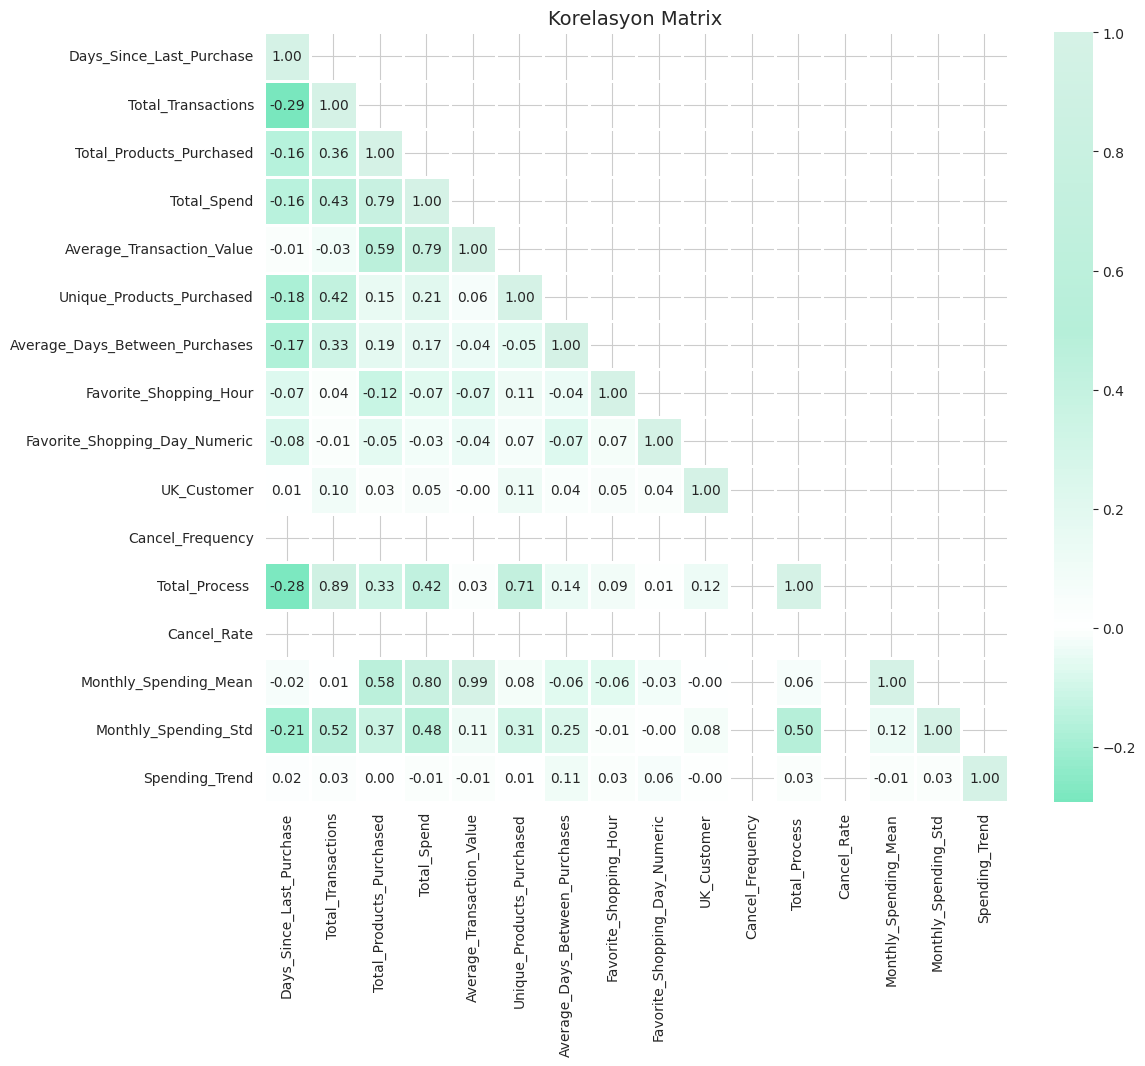

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Arka plan stilini sıfırla
sns.set_style('whitegrid')

# 'CustomerID' sütunu hariç korelasyon matrisini hesapla
corr = cleaned_customer_data.drop(columns=['CustomerID']).corr()

# Özel bir renk haritası tanımla
colors = ['#19a871', '#1bd691', 'white', '#b6efd9', '#d5f2e6']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Matrisin yalnızca alt üçgenini göstermek için bir maske oluşturun
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Isı haritasını çizin
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Korelasyon Matrix', fontsize=14)
plt.show()


# **CORRELATION ANALYST END**


# **FEATURE SCALING START**


Kümeleme ve boyut indirgeme işlemlerine geçmeden önce özelliklerimizi ölçeklendirmek zorunludur. Bu adım, özellikle K-means gibi mesafe tabanlı algoritmalar ve PCA gibi boyutsallık azaltma yöntemleri bağlamında büyük önem taşır.Çünkü K-means, kümeler oluşturmak için büyük ölçüde veri noktaları arasındaki 'mesafe' kavramına dayanır. Özellikler benzer bir ölçekte olmadığında, daha büyük değerlere sahip özellikler kümeleme sonucunu orantısız bir şekilde etkileyebilir ve potansiyel olarak yanlış gruplamalara yol açabilir.
PCA ise verilerin en çok değiştiği yönleri bulmayı amaçlar. Özellikler ölçeklendirilmediğinde, daha büyük değerlere sahip olanlar bu bileşenlere hakim olabilir ve verilerdeki altta yatan kalıpları doğru bir şekilde yansıtmayabilir.

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler'ı başlatın
scaler = StandardScaler()

# Ölçeklenmesi gerekmeyen sütunların listesi
columns_to_exclude = ['CustomerID', 'UK_Customer', 'Favorite_Shopping_Day_Numeric']

# Ölçeklenmesi gereken sütunların listesi
columns_to_scale = cleaned_customer_data.columns.difference(columns_to_exclude)

# Temizlenmiş veri kümesini kopyalayın
customer_data_scaled = cleaned_customer_data.copy()

# Ölçekleyiciyi veri kümesindeki gerekli sütunlara uygulama
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Ölçeklenmiş verilerin ilk birkaç satırını görüntüleyin
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12362.0,-1.145758,-0.421645,-0.109168,-0.253398,-0.039265,-0.477865,-0.144426,1.021657,1,0,0.0,-0.53466,0.0,-0.064029,-0.313878,-0.034069
1,12378.0,-0.027537,-0.421645,-0.450099,-0.102148,0.190868,-0.477865,-0.144426,-1.178726,1,0,0.0,-0.53466,0.0,0.163186,-0.313878,-0.034069
2,12381.0,-0.116285,-0.421645,-0.450099,-0.102148,0.190868,-0.477865,-0.144426,-1.618803,4,0,0.0,-0.53466,0.0,0.163186,-0.313878,-0.034069
4,12395.0,1.995910,-0.421645,-0.677387,-0.738659,-0.777608,-0.477865,-0.144426,1.461734,4,0,0.0,-0.53466,0.0,-0.793011,-0.313878,-0.034069
5,12399.0,1.143932,-0.421645,0.572696,-0.260960,-0.050771,-0.477865,-0.144426,-1.618803,2,0,0.0,-0.53466,0.0,-0.075390,-0.313878,-0.034069


In [ ]:
print(customer_data_scaled.head())

  CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12362.0                 -1.145758           -0.421645   
1    12378.0                 -0.027537           -0.421645   
2    12381.0                 -0.116285           -0.421645   
4    12395.0                  1.995910           -0.421645   
5    12399.0                  1.143932           -0.421645   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.109168    -0.253398                  -0.039265   
1                 -0.450099    -0.102148                   0.190868   
2                 -0.450099    -0.102148                   0.190868   
4                 -0.677387    -0.738659                  -0.777608   
5                  0.572696    -0.260960                  -0.050771   

   Unique_Products_Purchased  Average_Days_Between_Purchases  \
0                  -0.477865                       -0.144426   
1                  -0.477865                       -0.144426   
2       

Şu yöntemi uyguladım--> Model üzerinde dengeli bir etki sağlamak ve verilerdeki gerçek örüntüleri ortaya çıkarmak için verilerimizi standartlaştırdık yani özellikleri 0 ortalama ve 1 standart sapmaya sahip olacak şekilde dönüştürdük. Ancak, tüm özelliklerin ölçeklendirilmesi gerekmez. İşte istisnalar ve neden hariç tutulduklarının nedenleri:

CustomerID: Bu özellik sadece müşteriler için bir tanımlayıcıdır ve kümeleme için anlamlı bir bilgi içermez.
UK_Customer: Bu, müşterinin İngiltere'den olup olmadığını gösteren ikili bir özelliktir. Zaten 0 veya 1 değerini aldığından, ölçeklendirilmesi önemli bir fark yaratmayacaktır.
Favorite_Shopping_Day_Numeric: Bu özellik, müşterinin haftanın en sık işlem yaptığı gününü temsil eder. Tam sayılarla (0 ila 6) temsil edilen kategorik bir özellik olduğu için ölçeklendirilmesi gerekli olmayacaktır.

# **FEATURE SCALING END**

In [ ]:
customer_data_scaled.to_csv('dp_end.csv')

# **DIMENSIONALITY REDUCTION START**

Büyük veri setlerinde, büyük değişken kümesini bilgileri kaybetmeden daha küçük
bir değişken kümesine dönüştürerek, büyük veri kümelerinin boyutunu azaltma
işlemine boyutsallık küçültme denir. PCA (Principal Component Analysis) methodu yüksek boyutlu bir veri setinin boyutunu azaltmak için kullanılan en yaygın yöntemlerden biridir. PCA, varyasyonu vurgulamak ve bir veri kümesindeki güçlü modelleri yakalamak için kullanılan bir tekniktir. Verileri yeni bir değişkenler kümesine, ortogonal (ilişkisiz) temel bileşenlere dönüştürür ve ilk temel bileşenin en fazla varyansı yakalamasını ve sonraki her birinin daha az varyansı yakalamasını sağlar. Bu dönüşüm sadece boyutların küçültülmesinden ibaret değil; verilerin anlayışlı bir şekilde damıtılmasıdır.

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE

# t-SNE ile boyut azaltma
tsne = TSNE(n_components=2, perplexity=300, n_iter=1000, learning_rate=2000, random_state=36)

# TSNE dönüşümünü gerçekleştir
customer_data_tsne = tsne.fit_transform(customer_data_scaled)

# DataFrame oluşturma ve sütun isimlerini belirleme
df_tsne = pd.DataFrame(customer_data_tsne, columns= ['tsne1', 'tsne2'])

# İlk birkaç gözlemi görüntüleme
print(df_tsne.head())



      tsne1     tsne2
0 -5.925951 -5.478561
1 -5.932592 -5.462921
2 -5.931666 -5.458544
3 -5.937334 -5.448239
4 -5.936119 -5.446390


In [ ]:
df_tsne.to_csv('score.csv')

# **DIMENSIONALITY REDUCTION END**

# **K-MEANS CLUSTERING START**

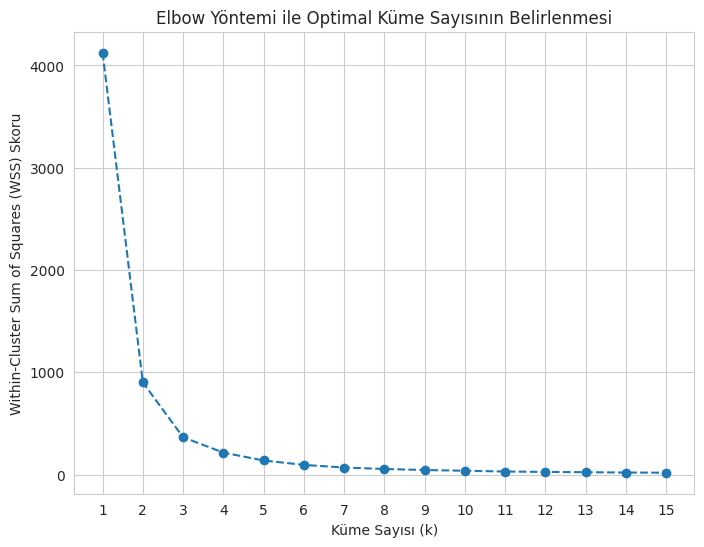

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow yöntemiyle uygun küme sayısını belirleme işlevi
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # n_init parametresi belirtilerek kullanılıyor
        kmeans.fit(points)
        sse.append(kmeans.inertia_)  # k-means modelinin inertia değerini WSS skoru olarak kaydeder
    return sse

# PCA dönüşümlü veri setini kullanarak WSS skorlarını hesapla
kmax = 15  # Denenecek maksimum küme sayısı
wss_scores = calculate_WSS(df_tsne, kmax)

# Elbow grafiği çizdirme
plt.figure(figsize=(8, 6))
plt.plot(range(1, kmax + 1), wss_scores, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS) Skoru')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısının Belirlenmesi')
plt.xticks(range(1, kmax + 1))
plt.show()


Bazen dirsek noktamız çok nettir ancak ne yazık ki, her zaman bu kadar net kümelenmiş verilere sahip olmuyoruz. Bu, dirseğin net ve keskin olmayabileceği anlamına gelir. Bu bizim kümelememiz içinde geçerli. Yukarıda görüldüğü üzere keskin ve kesin bir dirsek noktamız yok. İşte tamda böyle belirsiz bir durumda Siluet(Silhoutte) Yöntemini kullanabiliriz.

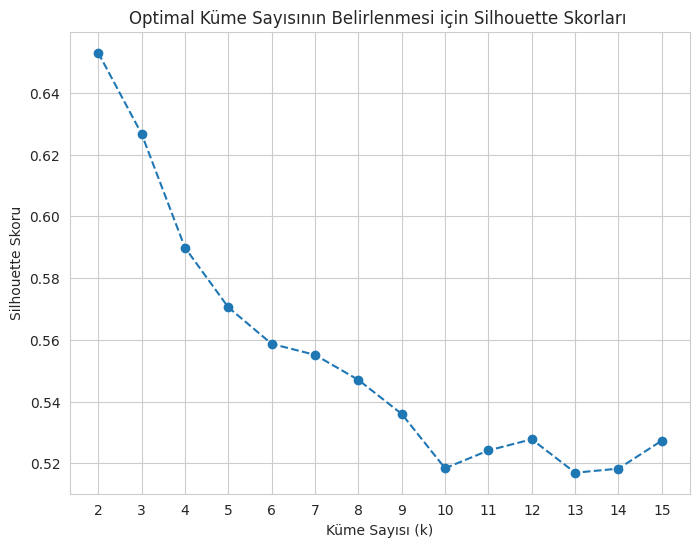

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []

# Küme sayısı için döngü
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, max_iter=10, random_state=42)  # max_iter parametresi eklendi
    kmeans.fit(df_tsne)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_tsne, labels, metric='euclidean')
    sil_scores.append(silhouette_avg)

# Silhouette skorlarını görselleştirme
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax + 1), sil_scores, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Optimal Küme Sayısının Belirlenmesi için Silhouette Skorları ')
plt.xticks(range(2, kmax + 1))
plt.show()



Siluet Puanı global maksimum değerine optimum k değerinde ulaşır. Bu ideal olarak Siluet Değeri-k grafiğinde bir zirve olarak görünmelidir. K = 7 de net bir tepe noktası vardır. Bu nedenle optimaldir. Bu nedenle K = 7 alınırak kümelemize devam edilecek.

In [ ]:
from sklearn.cluster import KMeans

# Optimal küme sayısı
optimal_k = 2

# KMeans modelini oluştur
kmeans = KMeans(n_clusters=optimal_k,  n_init=30, random_state=42)
kmeans.fit(df_tsne)  # PCA dönüşümlü veri üzerinde kümeleme yap

# Orijinal veri kümesine küme etiketlerini ekle
cleaned_customer_data['cluster_label'] = kmeans.labels_

# Sonuçları kontrol et
cleaned_customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Hour,Favorite_Shopping_Day_Numeric,UK_Customer,Cancel_Frequency,Total_Process,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster_label
0,12362.0,3,1,12,10.2,10.2,1,38.0,15,1,0,0,1,0.0,10.2,0.0,0.0,0
1,12378.0,129,1,6,12.6,12.6,1,38.0,10,1,0,0,1,0.0,12.6,0.0,0.0,0
2,12381.0,119,1,6,12.6,12.6,1,38.0,9,4,0,0,1,0.0,12.6,0.0,0.0,0
4,12395.0,357,1,2,2.5,2.5,1,38.0,16,4,0,0,1,0.0,2.5,0.0,0.0,0
5,12399.0,261,1,24,10.08,10.08,1,38.0,9,2,0,0,1,0.0,10.08,0.0,0.0,0


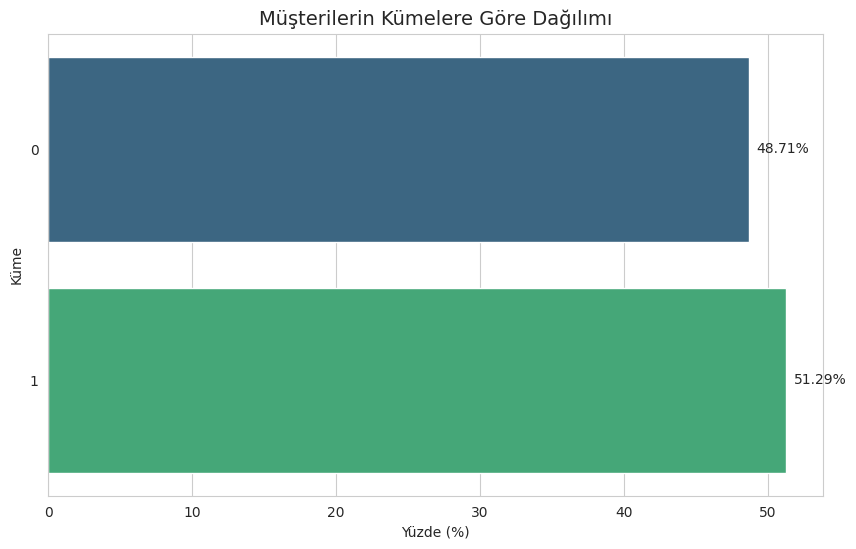

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Her bir küme için müşteri yüzdesini hesapla
cluster_percentage = (cleaned_customer_data['cluster_label'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Müşteri dağılımını görselleştir
plt.figure(figsize=(10, 6))

# Yeni kullanım: 'palette' yerine 'hue' kullanarak renklendirme yapın
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, hue='Cluster', orient='h', dodge=False,
            palette='viridis')  # 'viridis' paleti kullanarak renkleri değiştirin

# Çubuklar üzerine yüzde değerlerini ekleyin
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.title('Müşterilerin Kümelere Göre Dağılımı', fontsize=14)
plt.xlabel('Yüzde (%)')
plt.ylabel('Küme')
plt.legend().set_visible(False)  # Renk paletinin legendını kapat
plt.show()

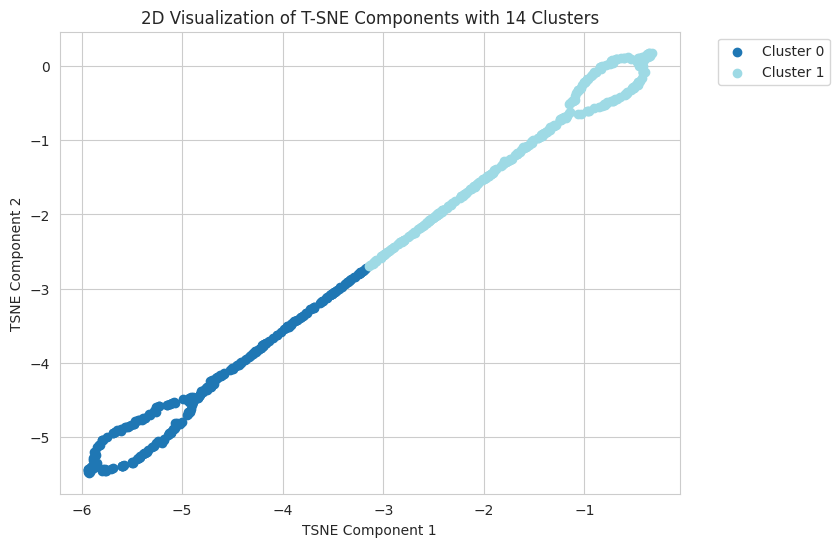

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Veri kümenizi oluşturduğunuzu varsayalım (df_tsne ve kmeans.labels_ gibi)
# df_tsne veri setindeki T-SNE dönüşüm sonrası bileşenleri kullanarak 2 boyutlu görselleştirme
plt.figure(figsize=(8, 6))



# Matplotlib'in default renk paletinden farklı renkler seçmek için bir renk listesi oluşturun
colors = plt.cm.tab20(np.linspace(0, 1, optimal_k))  # tab20 renk paletini kullanarak renkler oluştur

# Her küme için scatter plot çiz
for cluster in range(optimal_k):
    cluster_data = df_tsne[kmeans.labels_ == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}', color=colors[cluster])

plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('2D Visualization of T-SNE Components with 14 Clusters')

# Etiket tablosunu grafiğin dışında oluştur
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Veri seti ve küme etiketleri
data = df_tsne  # df_pca veri seti kullanılacak
cluster_labels = kmeans.labels_  # KMeans modelinden elde edilen küme etiketleri

# Siluet skorunu hesapla
silhouette_avg = silhouette_score(data, cluster_labels)

print(f"Silhouette Score --> Silüet Başarı Oranı: {silhouette_avg:.4f}")

Silhouette Score --> Silüet Başarı Oranı: 0.6530


Silhouette Skoru da yüksek bir değerdir. Yüksek bir Silhouette Skoru, kümeleme modelinizin her bir veri noktasının kendi kümesinde ne kadar iyi ve diğer kümelere göre ne kadar farklı olduğunu gösterir. Yüksek bir Silhouette Skoru, veri noktalarının iyi tanımlandığı ve kümeleme sonuçlarının tutarlı olduğunu gösterir.

In [ ]:
from sklearn.metrics import davies_bouldin_score

data = df_tsne  # df_pca veri seti kullanılacak
cluster_labels = kmeans.labels_  # KMeans modelinden elde edilen küme etiketleri

db_score = davies_bouldin_score(data, cluster_labels)
print(f"Davies-Bouldin İndeksi: {db_score:.4f}")

Davies-Bouldin İndeksi: 0.4581


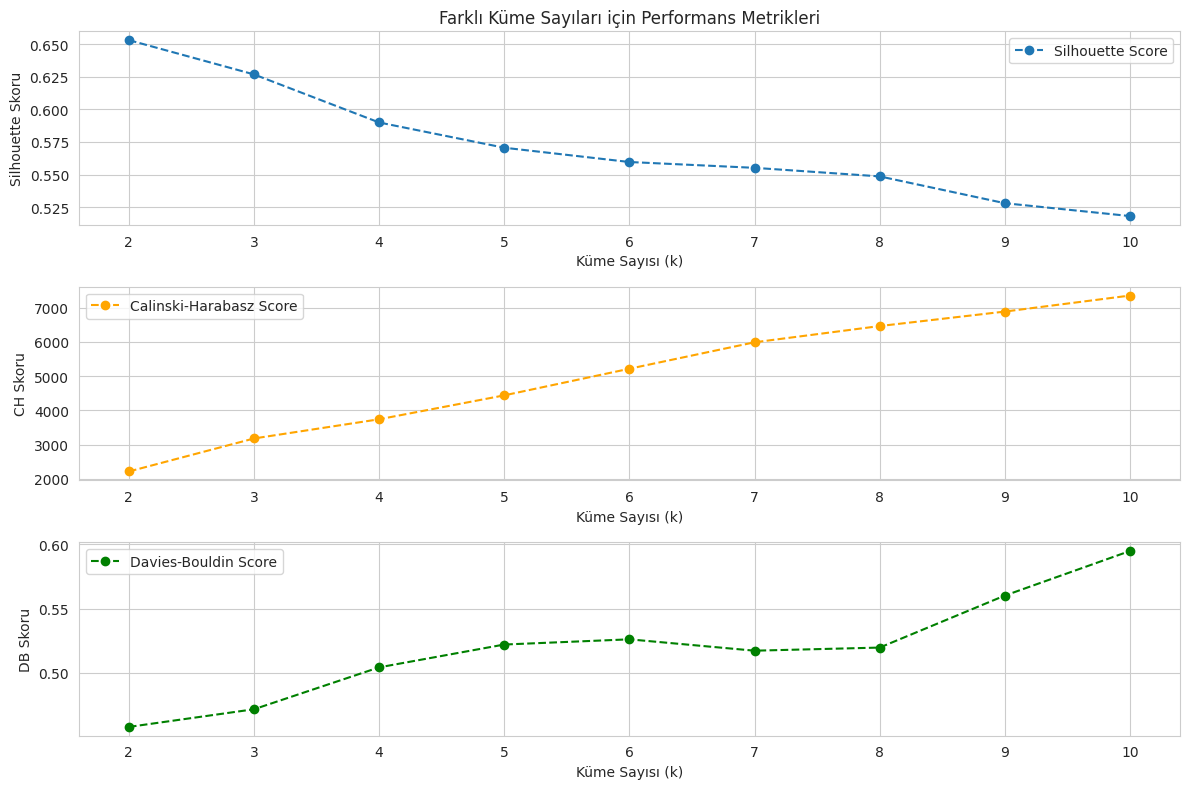

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Küme sayısı için denenecek aralık
min_k = 2
max_k = 10

# Metrik değerlerini depolamak için boş listeler oluşturun
sil_scores = []
ch_scores = []
db_scores = []

# Her bir küme sayısı için metrikleri hesaplayın
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_tsne)
    labels = kmeans.labels_

    # Siluet skoru hesapla
    sil_avg = silhouette_score(df_tsne, labels)
    sil_scores.append(sil_avg)

    # Calinski-Harabasz skoru hesapla
    ch_score = calinski_harabasz_score(df_tsne, labels)
    ch_scores.append(ch_score)

    # Davies-Bouldin skoru hesapla
    db_score = davies_bouldin_score(df_tsne, labels)
    db_scores.append(db_score)

# Metrik skorlarını görselleştirme
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(range(min_k, max_k + 1), sil_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Farklı Küme Sayıları için Performans Metrikleri')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(range(min_k, max_k + 1), ch_scores, marker='o', linestyle='--', color='orange', label='Calinski-Harabasz Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('CH Skoru')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(range(min_k, max_k + 1), db_scores, marker='o', linestyle='--', color='green', label='Davies-Bouldin Score')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('DB Skoru')
plt.xticks(range(min_k, max_k + 1))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Bu değer de düşük bir değerdir. Düşük bir Davies-Bouldin İndeksi, kümeler arası benzerliğin düşük olduğunu ve küme merkezlerinin birbirinden uzak olduğunu gösterir. Bu da iyi bir kümeleme performansını işaret eder.


In [ ]:
from sklearn.metrics import calinski_harabasz_score

data = df_tsne  # df_pca veri seti kullanılacak
cluster_labels = kmeans.labels_  # KMeans modelinden elde edilen küme etiketleri

ch_score = calinski_harabasz_score(data, cluster_labels)
print(f"Calinski-Harabasz Skoru: {ch_score:.4f}")

Calinski-Harabasz Skoru: 7353.1931


Bu skor yüksek bir değerdir. Yüksek bir Calinski-Harabasz skoru, küme içi benzerliğin kümeler arası farka göre daha yüksek olduğunu ve kümelemeye uygun olduğunu gösterir.

Öncelikle, farklı özelliklerdeki her bir kümenin centroid değerlerini görselleştirmek için radar grafikleri oluşturacağım. Bu, farklı kümelerin profillerinin hızlı bir şekilde görsel olarak karşılaştırılmasını sağlayabilir. Radar grafiklerini oluşturmak için öncelikle her kümenin centroid değerini hesaplamak gerekir. Bu centroid, belirli bir küme içindeki tüm özellikler için ortalama değeri temsil eder. Daha sonra, bu merkezroidleri radar grafiklerinde göstereceğim ve çeşitli kümelerdeki her bir özelliğin merkezi eğilimlerinin net bir şekilde görselleştirilmesini kolaylaştıracağım.

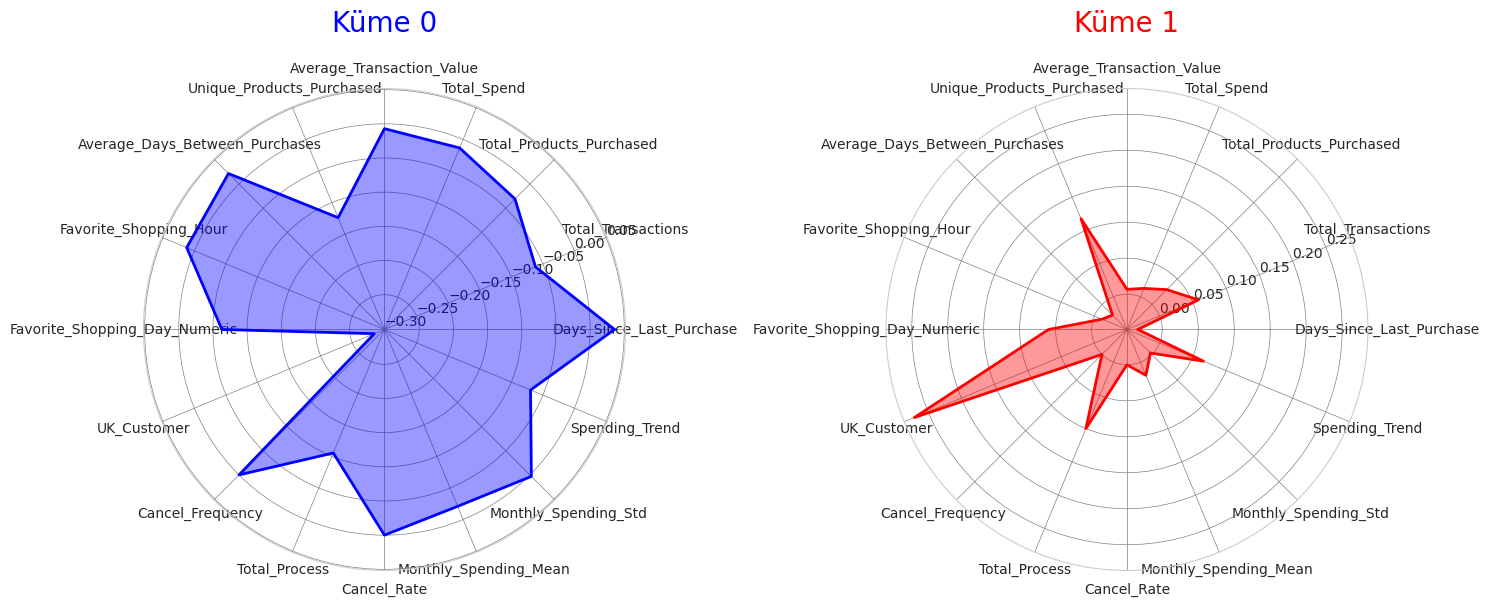

In [ ]:
# 'CustomerID' sütununu indeks olarak ayarlayarak yeni bir veri çerçevesi oluşturalım
df_customer = cleaned_customer_data.set_index('CustomerID')

# Veriyi standartlaştıralım (cluster_label sütununu hariç tutarak)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster_label'], axis=1))

# Standartlaştırılmış değerler içeren yeni bir veri çerçevesi oluşturalım ve cluster_label sütununu tekrar ekleyelim
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster_label'] = df_customer['cluster_label']

# Her bir kümenin merkezlerini hesaplayalım
cluster_centroids = df_customer_standardized.groupby('cluster_label').mean()

# Radar grafik oluşturmak için fonksiyon tanımlayalım
def create_radar_chart(ax, angles, data, color, cluster):
    # Veriyi çizelim ve alanı dolduralım
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Başlık ekleyelim
    ax.set_title(f'Küme {cluster}', size=20, color=color, y=1.1)

# Verileri ayarlayalım
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Her bir eksenin açısını hesaplayalım
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Grafik daire şeklinde olduğu için, "döngüyü tamamlamak" için başlangıcı sona ekleyelim
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Her bir küme için ayrı radar grafikleri oluşturalım
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(polar=True))

colors = ['blue', 'red']  # Küme renkleri
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Döngüyü tamamlayalım
    create_radar_chart(axs[i], angles, data, color, i)

    # Eksen etiketlerini ayarlayalım
    axs[i].set_xticks(angles[:-1])
    axs[i].set_xticklabels(labels[:-1])

    # Izgara ekleyelim
    axs[i].grid(color='grey', linewidth=0.5)

# Grafikleri düzenleyelim
plt.tight_layout()
plt.show()

Profil Çıkarımı: Amerikada olanların çoğu küme1 de.. iptal sıklığı ve iptal oranı küme1 e nispeten küme0da daha fazla. aylık ortalama harcama, standart sapma, harcama eğilimine bakınca küme 1 daha çok harcama yapıyor. Son harcamadan bu yana geçen günlere bakınca küme0 da daha çok aralık varken küme1de daha az aralık var.. Toplam işlem sayısı nispeten küme 0 da daha fazlayken satın alınan toplam ürün sayısı küme1de daha fazladır bu da küme 0ın daha olumsuz(iptal gibi) işlemlere daha meyilli olduğu çıkarımı yapmamıza bir nevi olanak sağlayabilir.. Küme 1in ortalama işlem değeri ve toplam harcaması küme0a göre daha fazla. Yani daha çok alışverişe meyilliler.
Satın alınan ürün çeşitliliğide küme1 de küme0 a oranla daha fazla.
Favori gün, saat, satın alma işlemleri arasındaki ortalama gün sayısına bakınca bunlarda küme1de küme0 a oranla daha olumlu.. Genel olarak profil çıkarımımız bu şekilde..


Radar grafiklerinden belirlenen profilleri doğrulamak için, küme etiketleriyle bölümlere ayrılmış her özellik için histogramlar çizebiliriz. Bu histogramlar, her bir küme içindeki özellik değerlerinin dağılımını görsel olarak incelememize ve böylece radar grafiklerine dayanarak oluşturduğumuz profilleri doğrulamamıza veya iyileştirmemize olanak tanıyacaktır.

In [ ]:
cleaned_customer_data.to_csv('modelling.csv')

In [ ]:
# Adım 1: Aykırı değerlerin CustomerID'lerini çıkarın ve işlemlerini ana veri çerçevesinden kaldırın
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Adım 2: Birleştirmeden önce her iki veri çerçevesinde de CustomerID için tutarlı veri türü sağlayın
cleaned_customer_data['CustomerID'] =cleaned_customer_data['CustomerID'].astype('float')

# Adım 3: Her bir işlem için küme bilgilerini almak üzere işlem verilerini müşteri verileriyle birleştirin
merged_data = df_filtered.merge(cleaned_customer_data[['CustomerID', 'cluster_label']], on='CustomerID', how='inner')

# Adım 4: Satılan toplam miktara göre her kümede en çok satan ilk 10 ürünü belirleyin
best_selling_products = merged_data.groupby(['cluster_label', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster_label', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster_label').head(10)

# Adım 5: Her bir kümedeki her bir müşteri tarafından satın alınan ürünlerin kaydını oluşturun
customer_purchases = merged_data.groupby(['CustomerID', 'cluster_label', 'StockCode'])['Quantity'].sum().reset_index()

# Adım 6: Her kümedeki her müşteri için öneriler oluşturun

recommendations = []
for cluster in top_products_per_cluster['cluster_label'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster_label'] == cluster]
    customers_in_cluster = cleaned_customer_data[cleaned_customer_data['cluster_label'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Müşteri tarafından halihazırda satın alınmış ürünleri belirle

        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster_label'] == cluster)]['StockCode'].tolist()

          # En çok satanlar listesinde müşterinin henüz satın almadığı ilk 3 ürünü bulun
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        # Önerileri listeye ekle
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Adım 7: Öneriler listesinden bir veri çerçevesi oluşturun ve bunu orijinal müşteri verileriyle birleştirin
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster_label', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = cleaned_customer_data.merge(recommendations_df, on=['CustomerID', 'cluster_label'], how='right')

In [ ]:
# customer_data_with_recommendations veri çerçevesinden rastgele 10 satır görüntüleyin
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
16003.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM
16611.0,21704,BAG 250G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM,21705,BAG 500G SWIRLY MARBLES
16395.0,46000S,POLYESTER FILLER PAD 40X40CM,46000M,POLYESTER FILLER PAD 45X45CM,22965,3 TRADITIONAL BISCUIT CUTTERS SET
15804.0,21703,BAG 125G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM,21705,BAG 500G SWIRLY MARBLES
15841.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM
16571.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM
15755.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,21705,BAG 500G SWIRLY MARBLES
15752.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,46000S,POLYESTER FILLER PAD 40X40CM
14543.0,21703,BAG 125G SWIRLY MARBLES,21704,BAG 250G SWIRLY MARBLES,22965,3 TRADITIONAL BISCUIT CUTTERS SET
